In [1]:
#all_segment_only_last_week_with12week_test_jan1_2025

In [2]:
#loading the file generated from last code
import pandas as pd
p = r"all_segment_only_last_week_with12week_test_jan1_2025.csv"
df = pd.read_csv(p)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_1499           30          27        30              4   
2   seg_2242           30          27        30              4   
3   seg_2238           30          27        30              4   
4   seg_2235           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -0.894223                        1.0   
1            -2.886142                        0.0   
2            -2.922880                        0.0   
3            -3.431949                        5.0   
4            -3.524745                        5.0   

   crashcount_binary_sum_12wk_test  
0                                1  
1                                0  
2                                0  
3                                4  
4                                3

In [3]:
df.week_interval.value_counts()

week_interval
4     3140
8     3140
12    3140
16    3140
20    3140
24    3140
28    3140
30    3140
Name: count, dtype: int64

In [4]:
len(df), 3140*8

(25120, 25120)

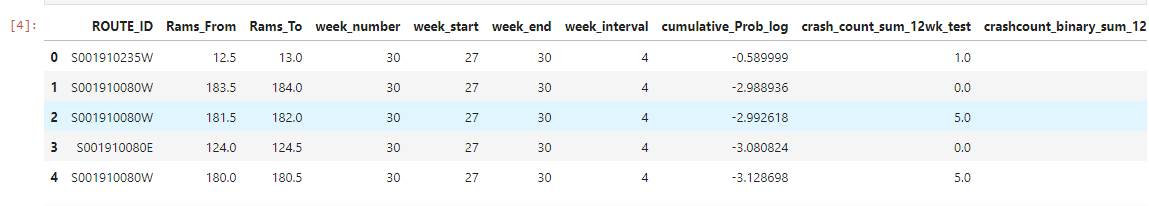

In [5]:
#https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.core.groupby.DataFrameGroupBy.rank.html
df['rank'] = df.groupby(['week_interval'])['cumulative_Prob_log'].rank(method = 'first', ascending=False)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_1499           30          27        30              4   
2   seg_2242           30          27        30              4   
3   seg_2238           30          27        30              4   
4   seg_2235           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -0.894223                        1.0   
1            -2.886142                        0.0   
2            -2.922880                        0.0   
3            -3.431949                        5.0   
4            -3.524745                        5.0   

   crashcount_binary_sum_12wk_test  rank  
0                                1   1.0  
1                                0   2.0  
2                                0   3.0  
3                                4   4.0  
4                                3   5.0

In [6]:
import math
math.ceil(200)

200

In [7]:
import math
# math.ceil converts a decimal number into integer
df['rank_range'] = df['rank'].apply(lambda x: math.ceil(x / 100) * 100)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_1499           30          27        30              4   
2   seg_2242           30          27        30              4   
3   seg_2238           30          27        30              4   
4   seg_2235           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -0.894223                        1.0   
1            -2.886142                        0.0   
2            -2.922880                        0.0   
3            -3.431949                        5.0   
4            -3.524745                        5.0   

   crashcount_binary_sum_12wk_test  rank  rank_range  
0                                1   1.0         100  
1                                0   2.0         100  
2                                0   3.0         100  
3                                4   4.0         100  
4                                3   5.0         100

In [8]:
df.loc[95:110]

segment_id  week_number  week_start  week_end  week_interval  \
95    seg_2218           30          27        30              4   
96    seg_1518           30          27        30              4   
97    seg_1517           30          27        30              4   
98    seg_1770           30          27        30              4   
99    seg_1495           30          27        30              4   
100   seg_1085           30          27        30              4   
101   seg_2224           30          27        30              4   
102   seg_2217           30          27        30              4   
103   seg_1521           30          27        30              4   
104    seg_987           30          27        30              4   
105    seg_986           30          27        30              4   
106   seg_1500           30          27        30              4   
107   seg_2703           30          27        30              4   
108   seg_1430           30          27        30              4   
109    seg_542           30          27        30              4   
110   seg_1503           30          27        30              4   

     cumulative_Prob_log  crash_count_sum_12wk_test  \
95             -8.988054                        3.0   
96             -8.988054                        1.0   
97             -8.988054                        1.0   
98             -9.004763                        1.0   
99             -9.005438                        1.0   
100            -9.065633                        1.0   
101            -9.087534                        1.0   
102            -9.094897                        1.0   
103            -9.094897                        4.0   
104            -9.135875                        2.0   
105            -9.144564                        2.0   
106            -9.163231                        1.0   
107            -9.202398                        0.0   
108            -9.202838                        1.0   
109            -9.206341                        1.0   
110            -9.208797                        0.0   

     crashcount_binary_sum_12wk_test   rank  rank_range  
95                                 1   96.0         100  
96                                 1   97.0         100  
97                                 1   98.0         100  
98                                 1   99.0         100  
99                                 1  100.0         100  
100                                1  101.0         200  
101                                1  102.0         200  
102                                1  103.0         200  
103                                4  104.0         200  
104                                2  105.0         200  
105                                1  106.0         200  
106                                1  107.0         200  
107                                0  108.0         200  
108                                1  109.0         200  
109                                1  110.0         200  
110                                0  111.0         200

In [9]:
df.to_csv("rank_jan1_2025.csv", index = False)

In [10]:
# the ranking is ok

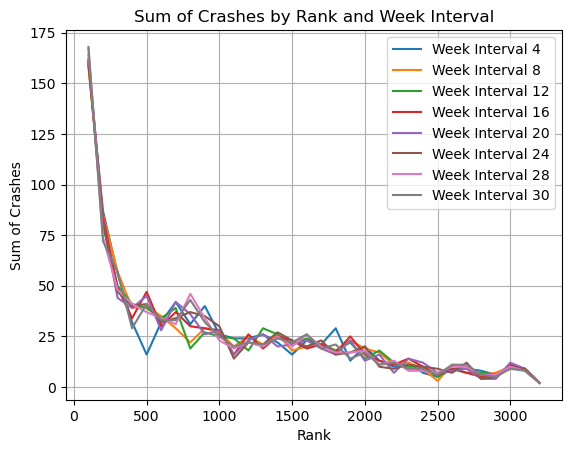

In [11]:
import matplotlib.pyplot as plt
grouped_df = df.groupby(['week_interval', 'rank_range']).sum().reset_index()

# Plot
for week_interval, group in grouped_df.groupby('week_interval'):
    plt.plot(group['rank_range'], group['crash_count_sum_12wk_test'], label=f'Week Interval {week_interval}')

plt.xlabel('Rank')
plt.ylabel('Sum of Crashes')
plt.title('Sum of Crashes by Rank and Week Interval')
plt.legend()
plt.grid(True)
plt.show()

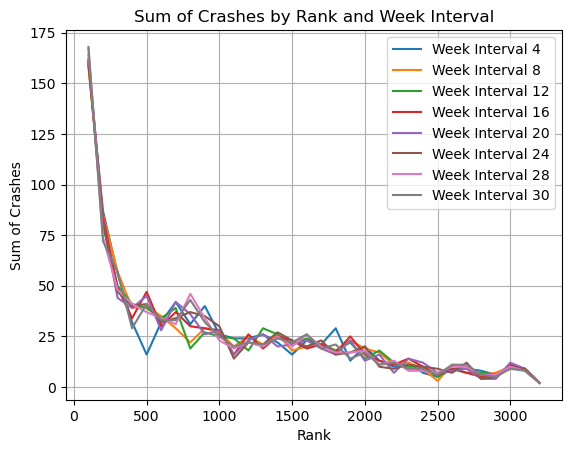

In [12]:
import matplotlib.pyplot as plt
grouped_df = df.groupby(['week_interval', 'rank_range']).sum().reset_index()

# Plot
for week_interval, group in grouped_df.groupby('week_interval'):
    plt.plot(group['rank_range'], group['crash_count_sum_12wk_test'], label=f'Week Interval {week_interval}')

plt.xlabel('Rank')
plt.ylabel('Sum of Crashes')
plt.title('Sum of Crashes by Rank and Week Interval')
plt.legend()
plt.grid(True)
plt.show()

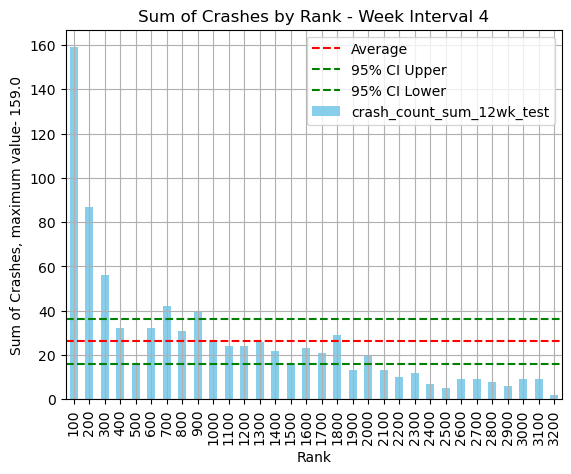

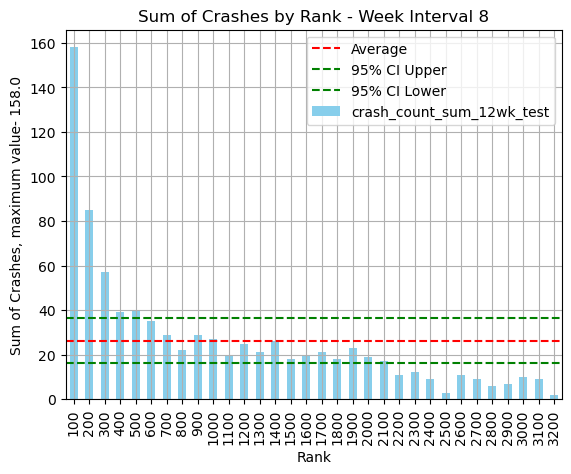

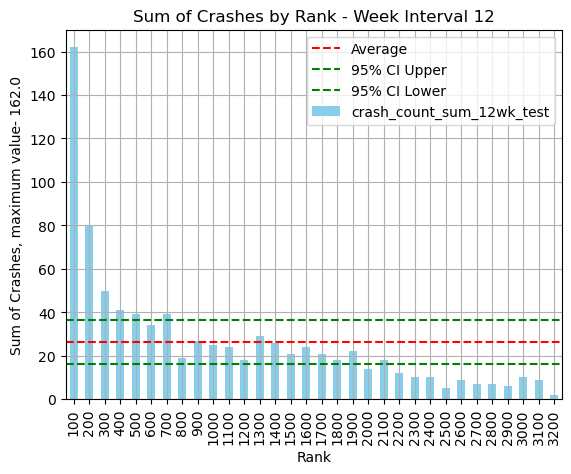

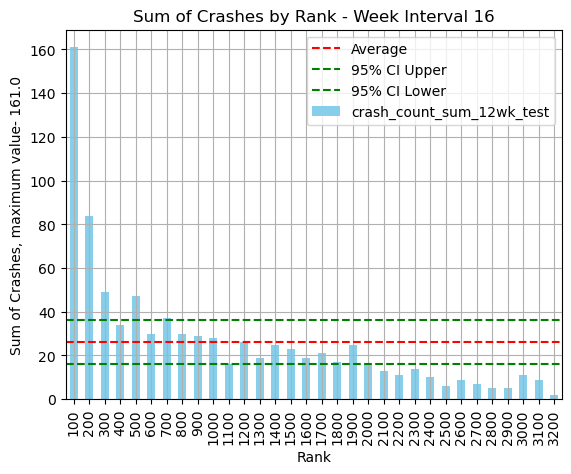

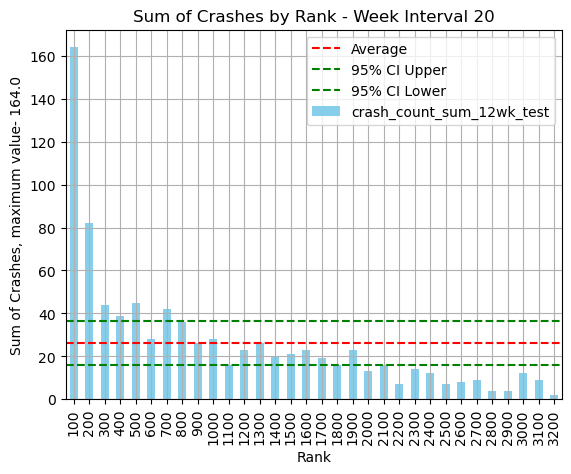

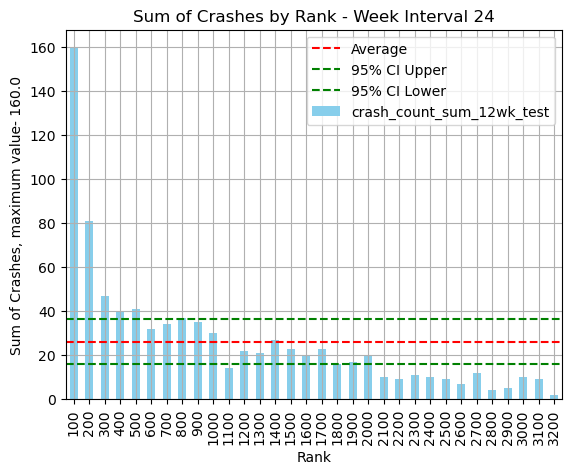

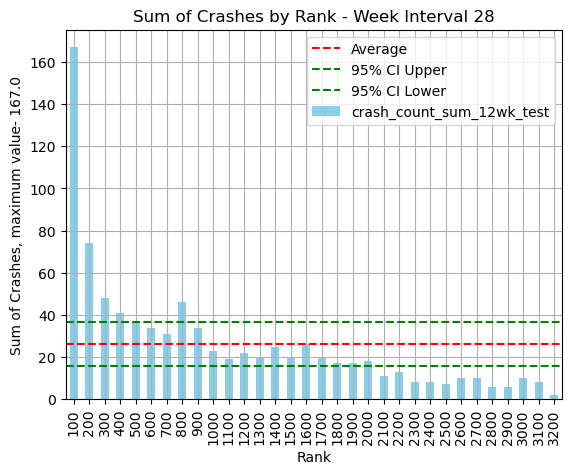

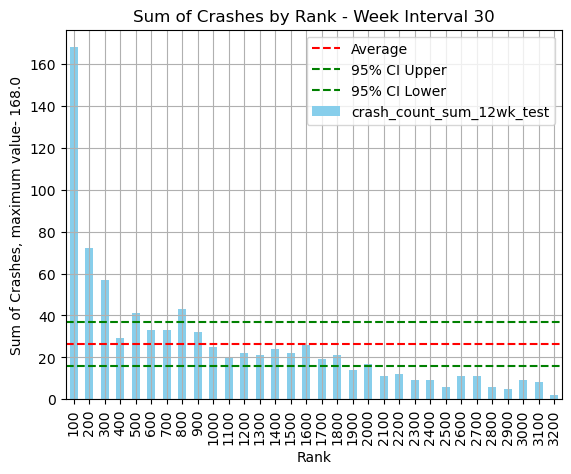

In [13]:
weeks = [4,8,12,16,20,24,28,30]

for week_no in weeks:
    df1 = df[df['week_interval']==week_no]
    grouped_data = df1.groupby('rank_range')['crash_count_sum_12wk_test'].sum()
    max_val = max(grouped_data)
    # Create bar plot
    #grouped_data.plot(kind='bar', color='skyblue')
    avg = grouped_data.mean()
    ci = 1.96 * grouped_data.sem()  # 95% CI (assuming normal distribution)

    # Create bar plot
    ax = grouped_data.plot(kind='bar', color='skyblue')
    ax.set_title(f'Sum of Crashes by Rank - Week Interval {week_no}')
    ax.set_xlabel('Rank')
    ax.set_ylabel(f'Sum of Crashes, maximum value- {max_val}')
    ax.set_xticklabels(grouped_data.index, rotation=90)
    ax.grid(True)
    
    # Add average line
    ax.axhline(y=avg, color='red', linestyle='--', label='Average')
    
    # Add 95% CI lines
    ax.axhline(y=avg + ci, color='green', linestyle='--', label='95% CI Upper')
    ax.axhline(y=avg - ci, color='green', linestyle='--', label='95% CI Lower')
    
    # Show legend
    ax.legend()
    plt.savefig(f"image/{week_no}_for12weektest_jan2_2025.png")
    plt.show()
    plt.clf()
    #plt.savefig(f"C:/Users/maroa/Box/Projects_Maroa/Paper_writing/data/tablueu_files/images_tableau/{week_no}_for12weektest.png")
    
plt.close()  
    



In [14]:
grouped_data

rank_range
100     168.0
200      72.0
300      57.0
400      29.0
500      41.0
600      33.0
700      33.0
800      43.0
900      32.0
1000     25.0
1100     20.0
1200     22.0
1300     21.0
1400     24.0
1500     22.0
1600     26.0
1700     19.0
1800     21.0
1900     14.0
2000     17.0
2100     11.0
2200     12.0
2300      9.0
2400      9.0
2500      6.0
2600     11.0
2700     11.0
2800      6.0
2900      5.0
3000      9.0
3100      8.0
3200      2.0
Name: crash_count_sum_12wk_test, dtype: float64

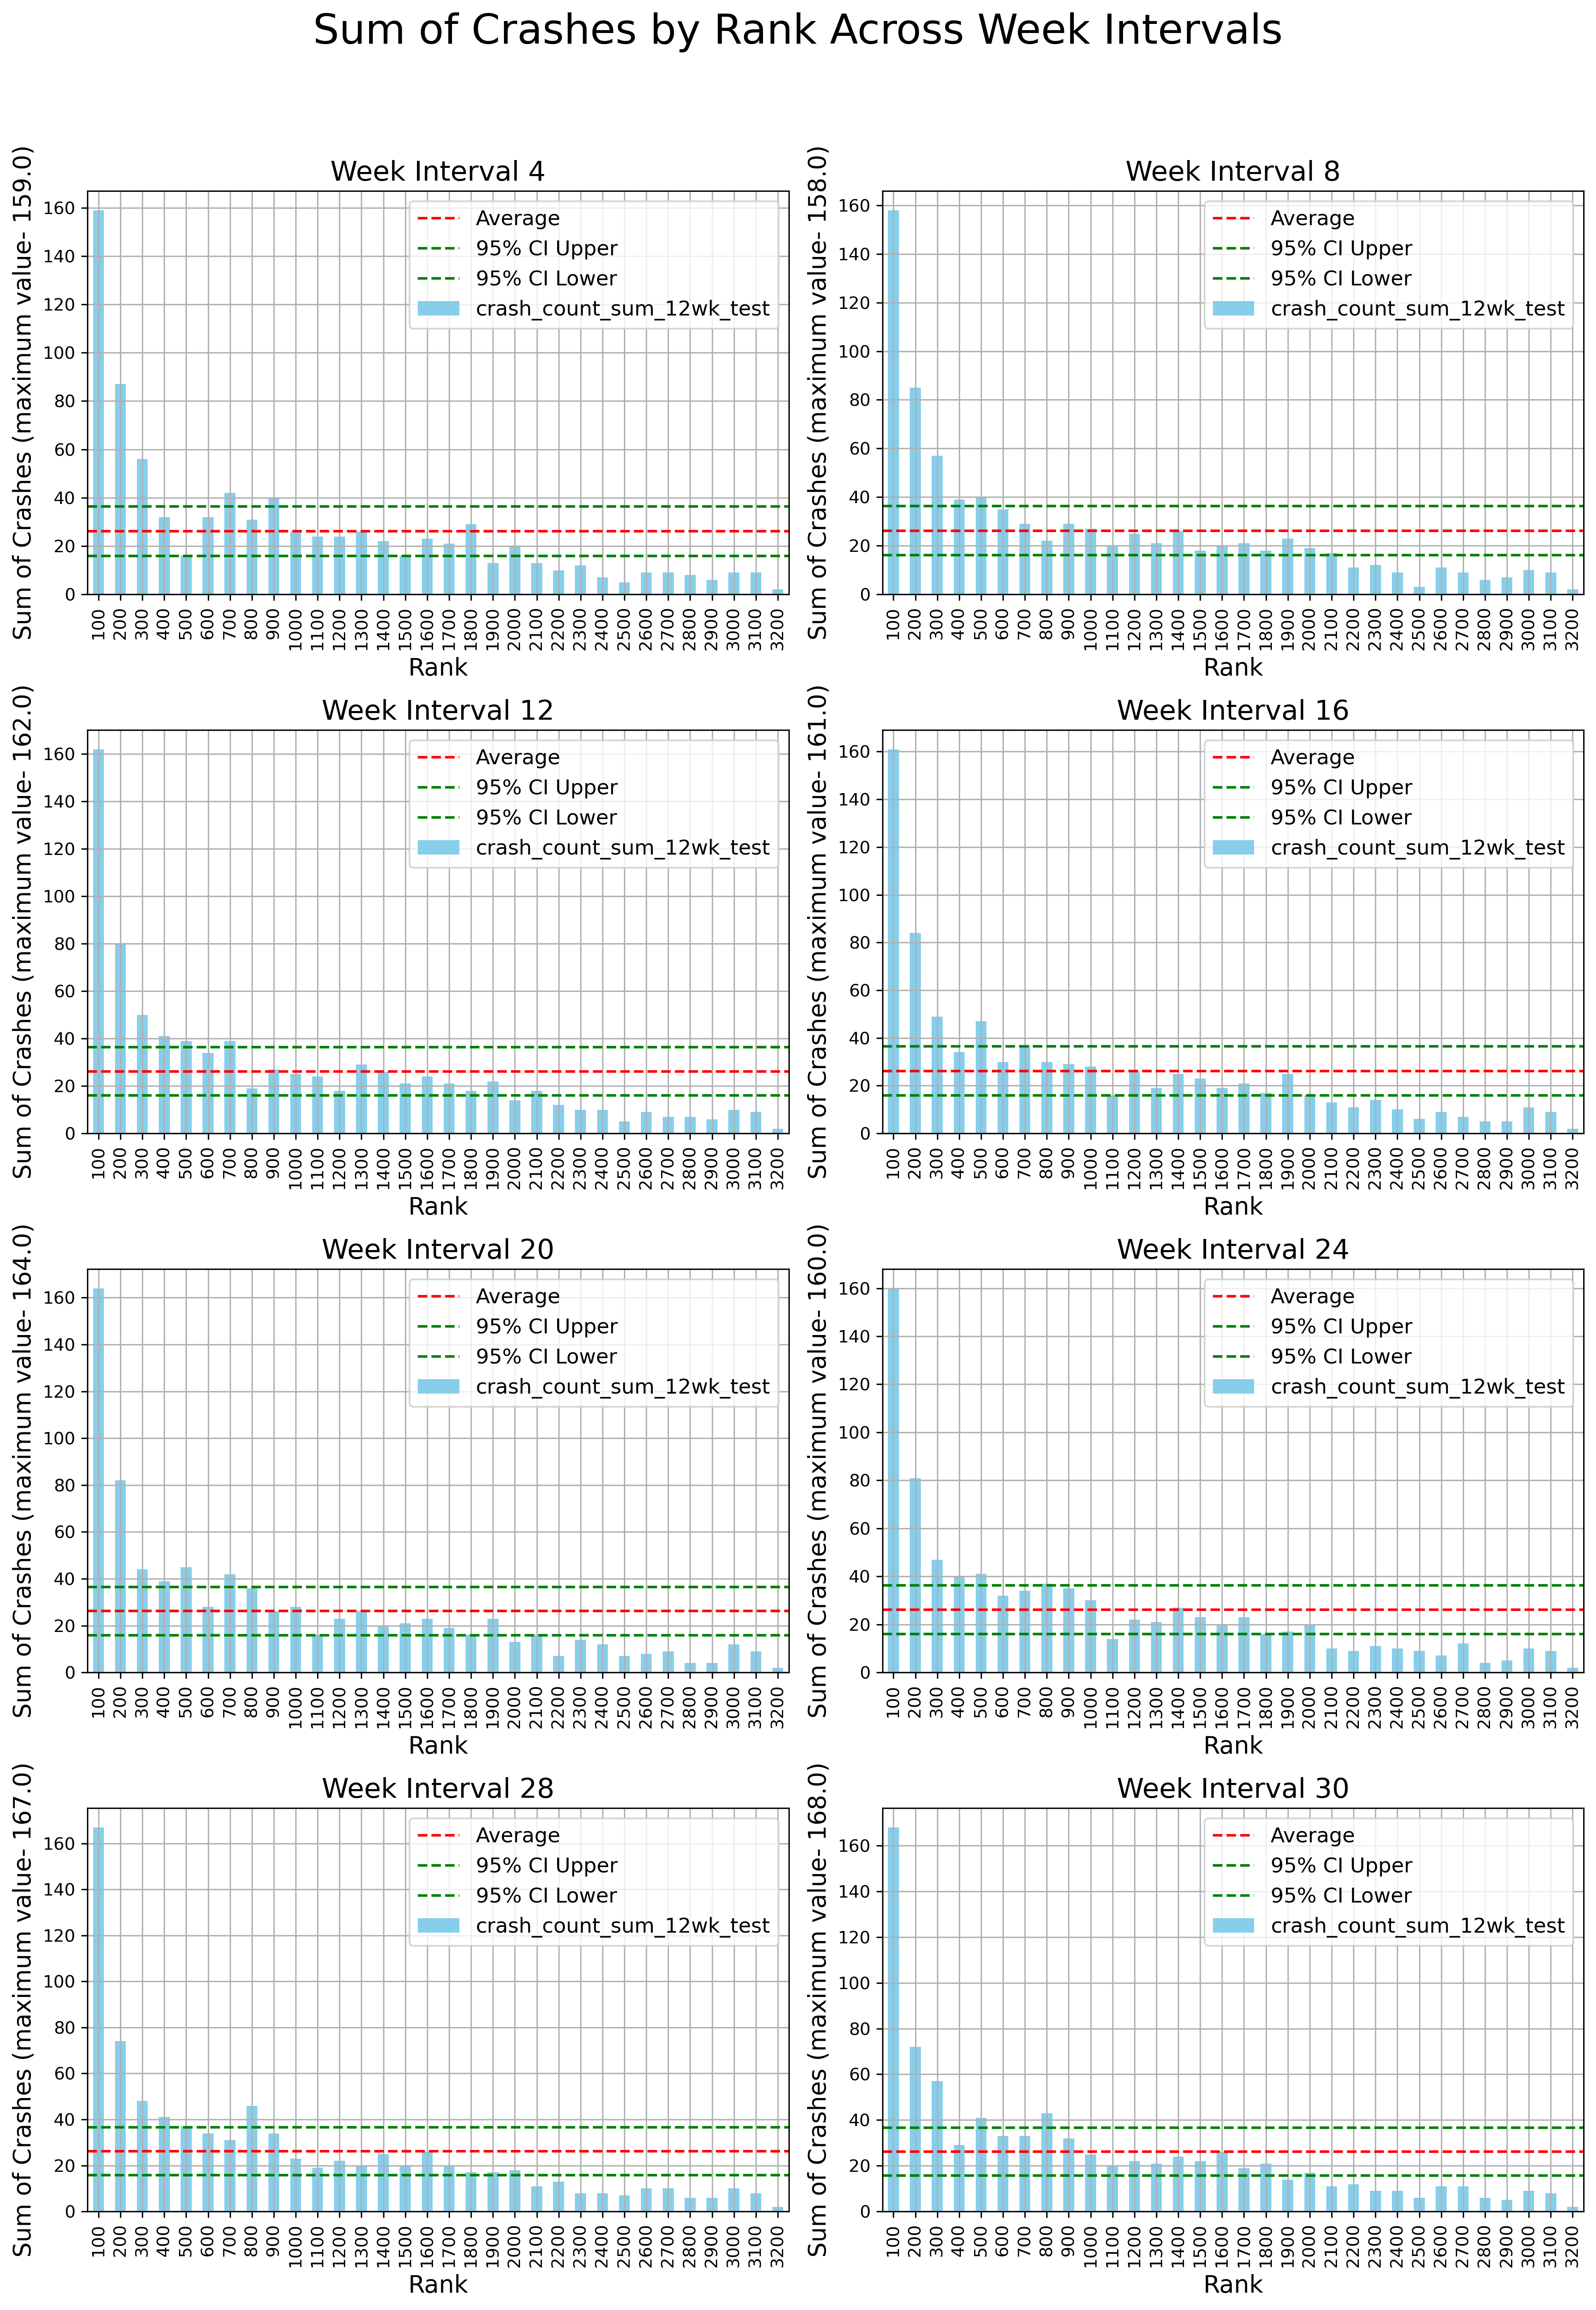

In [15]:
weeks = [4,8,12,16,20,24,28,30]

'''# Example data setup
np.random.seed(42)
data = {
    "week_interval": np.repeat([4, 8, 12, 16, 20, 24, 28, 30], 10),
    "rank_range": np.tile([f"Rank {i}" for i in range(1, 11)], 8),
    "crash_count_sum_12wk_test": np.random.randint(0, 100, 80)
}

df = pd.DataFrame(data)

# List of weeks to iterate over
weeks = [4, 8, 12, 16, 20, 24, 28, 30]'''

# Create a 2x4 subplot
fig, axes = plt.subplots(4, 2, figsize=(13, 19), dpi=300)
fig.suptitle("Sum of Crashes by Rank Across Week Intervals", fontsize=24)

# Loop through weeks and plot on subplots
for i, week_no in enumerate(weeks):
    # Filter data for the specific week
    df1 = df[df['week_interval'] == week_no]
    grouped_data = df1.groupby('rank_range')['crash_count_sum_12wk_test'].sum()
    max_val = grouped_data.max()
    avg = grouped_data.mean()
    ci = 1.96 * grouped_data.sem()  # 95% CI (assuming normal distribution)
    
    # Plotting
    ax = axes[i // 2, i % 2]
    grouped_data.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f"Week Interval {week_no}", fontsize=16)
    ax.set_xlabel("Rank", fontsize=14)
    ax.set_ylabel(f'Sum of Crashes (maximum value- {max_val})', fontsize=14)
    ax.set_xticklabels(grouped_data.index, rotation=90, fontsize=10)
    ax.grid(True)
    
    # Add average and confidence interval lines
    ax.axhline(y=avg, color='red', linestyle='--', label='Average')
    ax.axhline(y=avg + ci, color='green', linestyle='--', label='95% CI Upper')
    ax.axhline(y=avg - ci, color='green', linestyle='--', label='95% CI Lower')
    
    # Show legend
    ax.legend(fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save high-resolution plot
output_path = "image/crash_data_subplot_matrix_total_crash.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


### for binary data (segment has crashes or not)

In [16]:
import numpy as np
df['crash_binary_12week_test'] = np.where(df.crash_count_sum_12wk_test>=1,1,0)
df.head()

segment_id  week_number  week_start  week_end  week_interval  \
0   seg_2702           30          27        30              4   
1   seg_1499           30          27        30              4   
2   seg_2242           30          27        30              4   
3   seg_2238           30          27        30              4   
4   seg_2235           30          27        30              4   

   cumulative_Prob_log  crash_count_sum_12wk_test  \
0            -0.894223                        1.0   
1            -2.886142                        0.0   
2            -2.922880                        0.0   
3            -3.431949                        5.0   
4            -3.524745                        5.0   

   crashcount_binary_sum_12wk_test  rank  rank_range  crash_binary_12week_test  
0                                1   1.0         100                         1  
1                                0   2.0         100                         0  
2                                0   3.0         100                         0  
3                                4   4.0         100                         1  
4                                3   5.0         100                         1

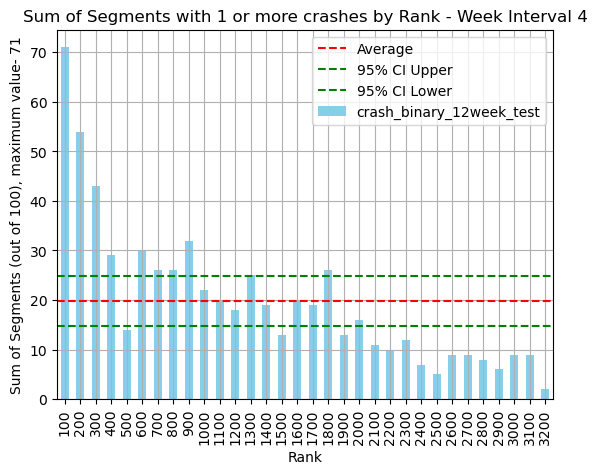

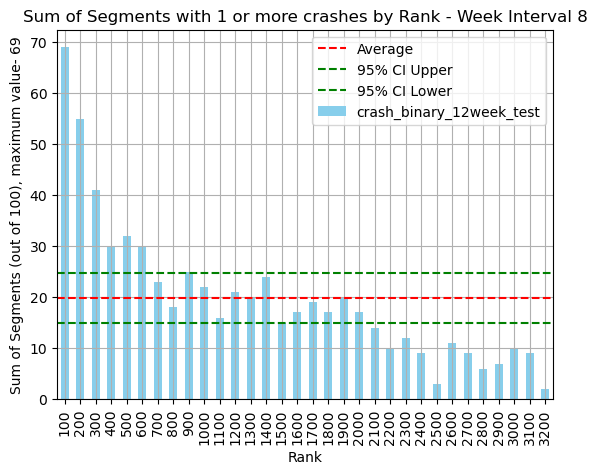

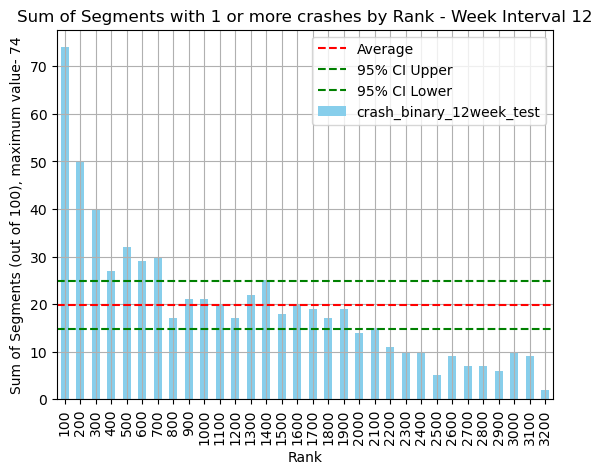

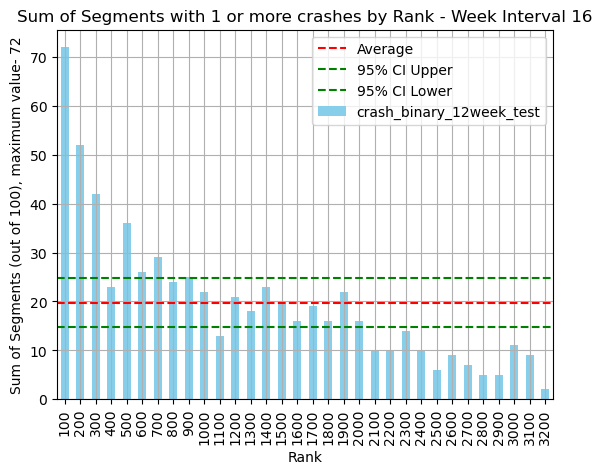

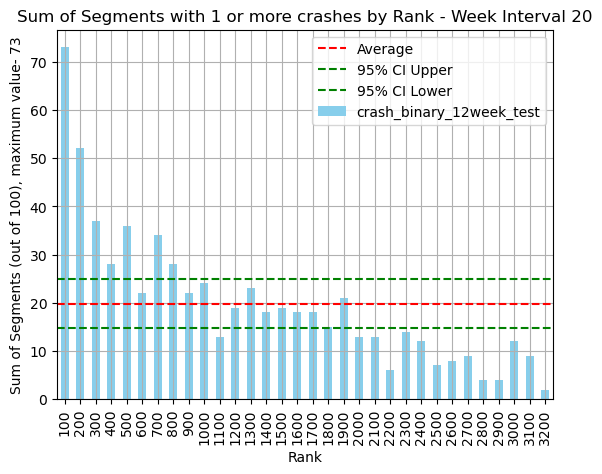

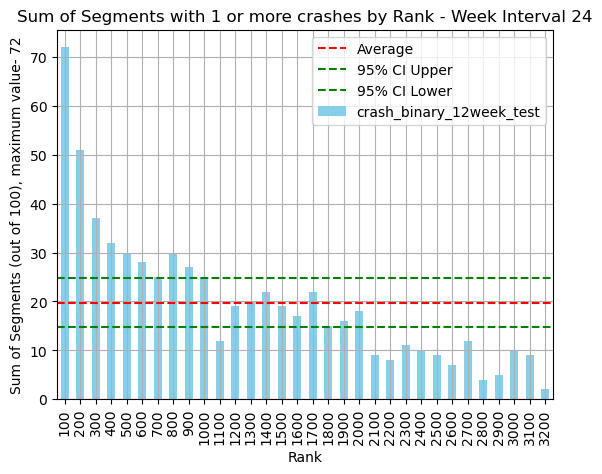

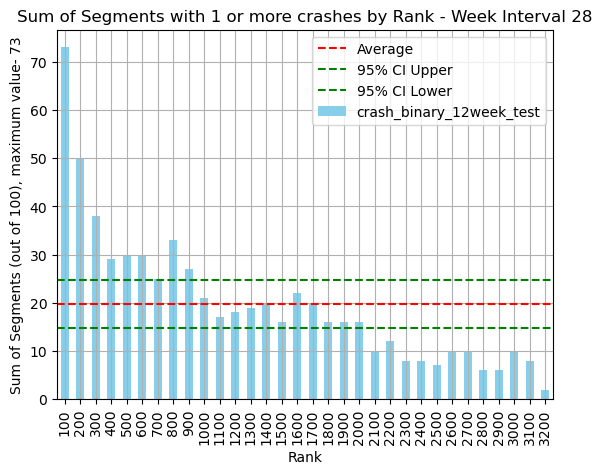

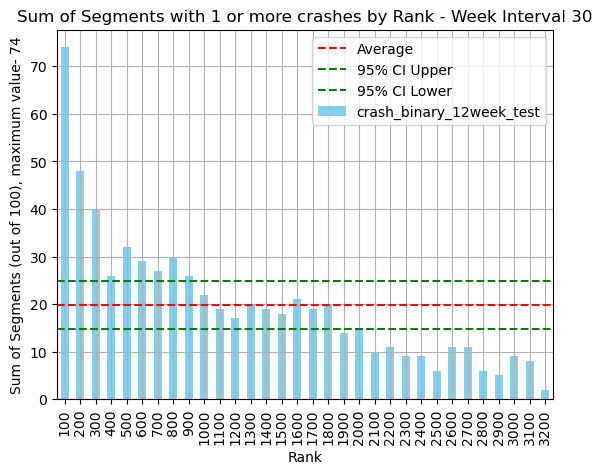

In [17]:
weeks = [4,8,12,16,20,24,28,30]
for week_no in weeks:
    df1 = df[df['week_interval']==week_no]
    grouped_data = df1.groupby('rank_range')['crash_binary_12week_test'].sum()
    max_val = max(grouped_data)
    # Create bar plot
    avg = grouped_data.mean()
    ci = 1.96 * grouped_data.sem()  # 95% CI (assuming normal distribution)

    # Create bar plot
    ax = grouped_data.plot(kind='bar', color='skyblue')
    ax.set_title(f'Sum of Segments with 1 or more crashes by Rank - Week Interval {week_no}')
    ax.set_xlabel('Rank')
    ax.set_ylabel(f'Sum of Segments (out of 100), maximum value- {max_val}')
    ax.set_xticklabels(grouped_data.index, rotation=90)
    ax.grid(True)
    
    # Add average line
    ax.axhline(y=avg, color='red', linestyle='--', label='Average')
    
    # Add 95% CI lines
    ax.axhline(y=avg + ci, color='green', linestyle='--', label='95% CI Upper')
    ax.axhline(y=avg - ci, color='green', linestyle='--', label='95% CI Lower')
    
    # Show legend
    ax.legend()
    plt.savefig(f"image/{week_no}_for12weektest_crash_binary_jan2_2025.png")
    plt.show()
    #plt.savefig(f"C:/Users/maroa/Box/Projects_Maroa/Paper_writing/data/tablueu_files/images_tableau/{week_no}_for12weektest.png")
    
    
    



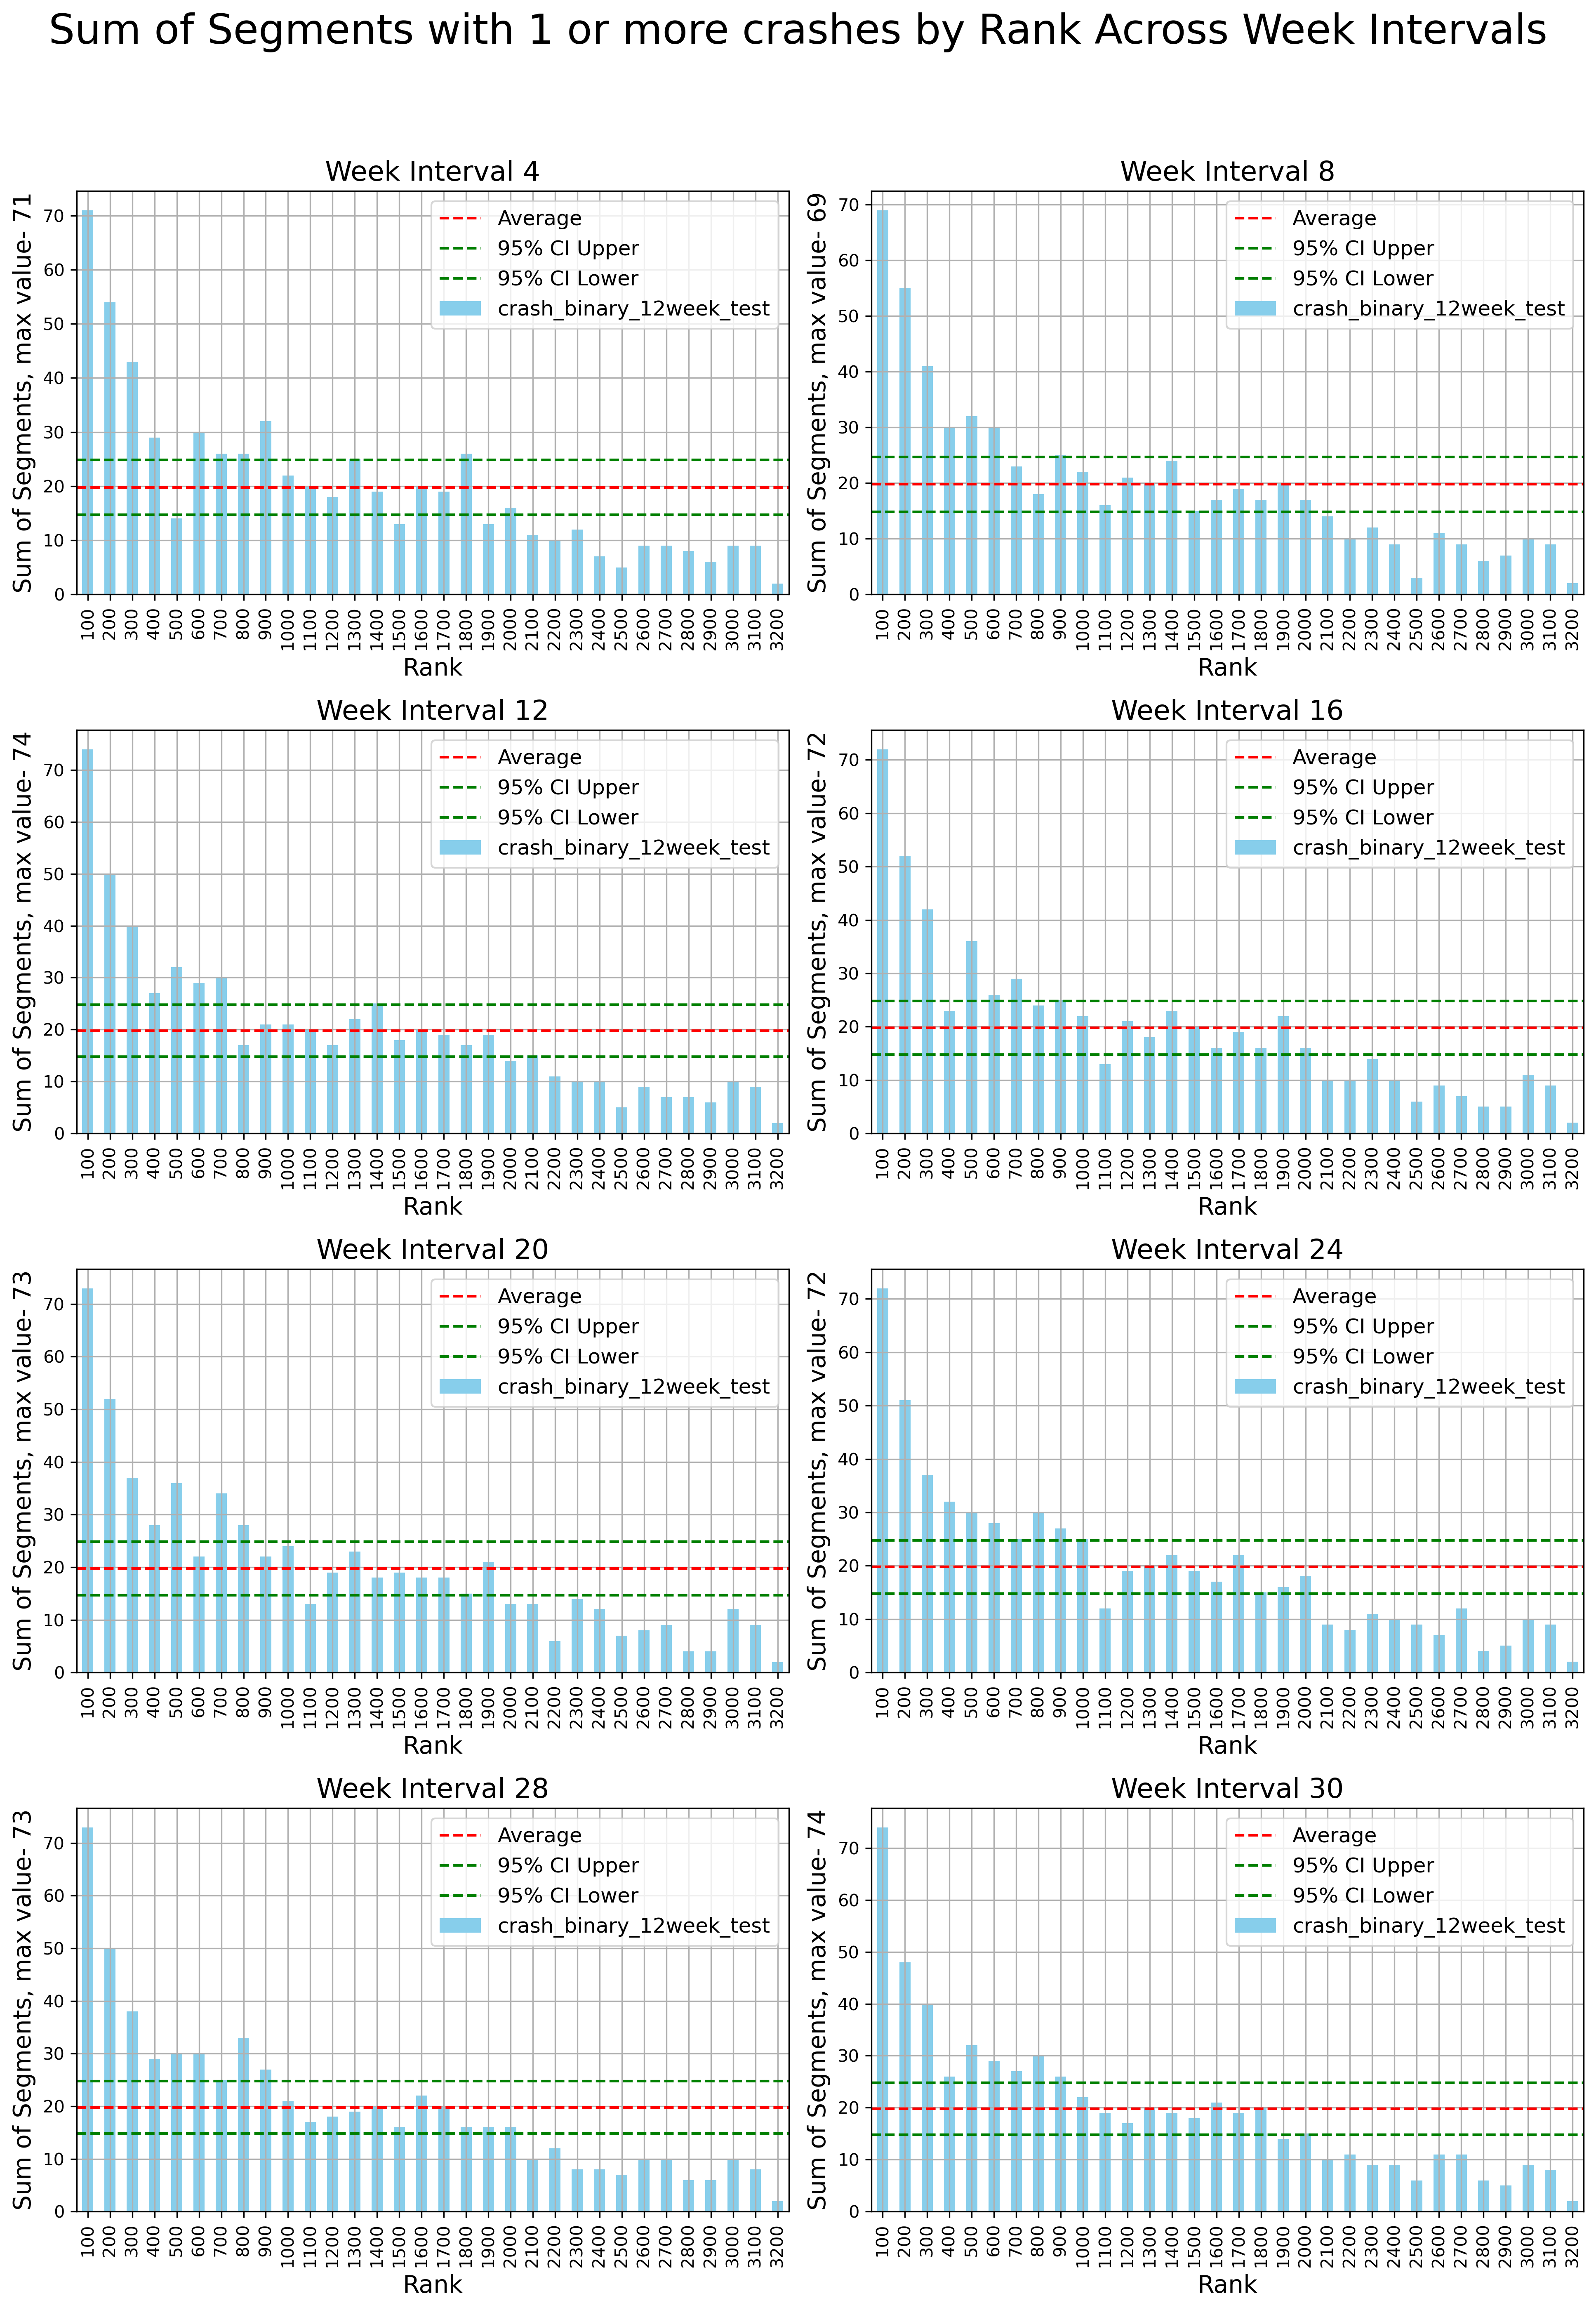

In [18]:
weeks = [4,8,12,16,20,24,28,30]

# Create a 2x4 subplot
fig, axes = plt.subplots(4, 2, figsize=(13, 19), dpi=300)
fig.suptitle("Sum of Segments with 1 or more crashes by Rank Across Week Intervals", fontsize=24)

# Loop through weeks and plot on subplots
for i, week_no in enumerate(weeks):
    # Filter data for the specific week
    df1 = df[df['week_interval'] == week_no]
    grouped_data = df1.groupby('rank_range')['crash_binary_12week_test'].sum()
    max_val = grouped_data.max()
    avg = grouped_data.mean()
    ci = 1.96 * grouped_data.sem()  # 95% CI (assuming normal distribution)
    
    # Plotting
    ax = axes[i // 2, i % 2]
    grouped_data.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f"Week Interval {week_no}", fontsize=16)
    ax.set_xlabel("Rank", fontsize=14)
    ax.set_ylabel(f'Sum of Segments, max value- {max_val}', fontsize=14)
    ax.set_xticklabels(grouped_data.index, rotation=90, fontsize=10)
    ax.grid(True)
    
    # Add average and confidence interval lines
    ax.axhline(y=avg, color='red', linestyle='--', label='Average')
    ax.axhline(y=avg + ci, color='green', linestyle='--', label='95% CI Upper')
    ax.axhline(y=avg - ci, color='green', linestyle='--', label='95% CI Lower')
    
    # Show legend
    ax.legend(fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save high-resolution plot
output_path = "image/crash_data_subplot_matrix_total_segment_with_min1_crash.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")

# Show plot
plt.show()
